<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-и-анализ-фильмов-за-2020-год" data-toc-modified-id="Подготовка-и-анализ-фильмов-за-2020-год-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка и анализ фильмов за 2020 год</a></span></li><li><span><a href="#Составление-запросов-года-фильма-в-Google" data-toc-modified-id="Составление-запросов-года-фильма-в-Google-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Составление запросов года фильма в Google</a></span></li><li><span><a href="#Определение-эпохи" data-toc-modified-id="Определение-эпохи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение эпохи</a></span></li><li><span><a href="#Построение-диаграммы-по-эпохам" data-toc-modified-id="Построение-диаграммы-по-эпохам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение диаграммы по эпохам</a></span></li></ul></div>

## Подготовка и анализ фильмов за 2020 год

In [1]:
import re
import pandas as pd
import numpy as np

In [2]:
with open('D:/HOBBIES/PROGRAMMER/ANALYSIS/films.txt', encoding='utf-8') as f:
    films2020 = []
    for i in f:
        if i != '':
            i = i.strip()
            if re.search('сезон', i) == None:
                films2020.append(i)

In [3]:
len(films2020)

154

In [4]:
with open('D:/HOBBIES/PROGRAMMER/ANALYSIS/new_films.txt', encoding='utf-8') as f:
    new_films = []
    for i in f:
        if i != '':
            i = i.split()
            k = i[:-1]
            if re.search('сезон', ' '.join(k)) == None:
                i = ' '.join(i[:-1])
                new_films.append(i)

In [5]:
len(new_films)

70

In [6]:
films2020.extend(new_films)

In [7]:
len(films2020)

224

In [8]:
films2020.sort()
data = pd.DataFrame(films2020, columns=['Фильм'])
data

,Фильм
0,12 Лет Рабства
1,12 Разгневанных Мужчин
2,1917
3,500 Дней Лета
4,Ex Machine
...,...
219,"Шпион, Выйди Вон!"
220,Шпионский Мост
221,Эд Вуд
222,Эта Замечательная Жизнь


## Составление запросов года фильма в Google

In [10]:
import requests
from bs4 import BeautifulSoup

In [92]:
def year_of_film(film):
    print(film)
    film = film.split(' ')
    try:
        req = requests.get(f"https://www.google.ru/search?ie=UTF-8&q={'%20'.join(film)}")
        soup = BeautifulSoup(req.text, 'lxml')
        for g in soup.find_all(class_="BNeawe tAd8D AP7Wnd"):
            if re.search('\w+ \d{4} г.', g.text) or re.search('\d{4} г.', g.text):
                res = g.text.split()
                return res[(res.index('г.'))-1]
            else: raise TypeError
        raise TypeError
    except TypeError:
        req = requests.get(f"https://www.google.ru/search?ie=UTF-8&q={'%20'.join(film)}%20фильм%20год%20выпуска")
        soup = BeautifulSoup(req.text, 'lxml')
        for g in soup.find_all(class_="BNeawe tAd8D AP7Wnd"):
            if re.search('\w+ \d{4} г.', g.text):
                res = g.text.split()
                return res[(res.index('г.'))-1]

# for i in list_spec:
#     print(f'{i} - {year_of_film(films_for_ques[i])}')
# for i in range(200, 220):
# for i in [12, 13, 15, 18]:
# print(data.loc[109, 'Фильм'], year_of_film(data.loc[109, 'Фильм']), sep=': ')

data['Год'] = data['Фильм'].apply(year_of_film)

12 Лет Рабства
12 Разгневанных Мужчин
1917
500 Дней Лета
Ex Machine
А В Душе Я Танцую
Август Раш
Авиатор
Адвокат Дьявола
Академия Рашмор
Амели
Американский Психопат
Анима
Антихрист
Апокалипсис Сегодня
Артист
Аэроплан
Баллада Бастера Сркаггса
Бархатная Бензопила
Бегущий По Лезвию
Бегущий По Лезвию 2049
Безумный Макс: Дорога ярости
Бердмэн
Берегись Автомобиля
Бивень
Боль и Слава
Борат
Борат 2
Бразилия
Брат
Брат 2
Братья
Брачная История
Бриллиантовая Рука
Бутылочная Ракета
Быть Джоном Малковичем
Бэтмен: Начало
В Бой Идут Одни «Старики»
В Погоне За Счастьем
В Центре Внимания
Ван Гог. На пороге вечности
Великая Красота
Властелин Колец: Братство Кольца
Властелин Колец: Возвращение Короля
Властелин Колец: Две Крепости
Водная Жизнь
Возвращение
Враг
Врождённый Порок
Вход в Пустоту
Выживут Только Любовники
Выживший
Голова-Ластик
Головокружение
Голубь Сидел на Ветке, Размышляя о Бытие
Город Бога
Гость
Гравитация
Гражданин Кейн
Девушка Из Дании
Девчата
Джентльмены
Джентльмены Удачи
Дикие Истории
Д

In [93]:
data

,Фильм,Год
0,12 Лет Рабства,2013
1,12 Разгневанных Мужчин,1957
2,1917,2019
3,500 Дней Лета,2009
4,Ex Machine,2014
...,...,...
219,"Шпион, Выйди Вон!",2011
220,Шпионский Мост,2015
221,Эд Вуд,1994
222,Эта Замечательная Жизнь,1946


## Определение эпохи

In [100]:
from datetime import datetime

ages = list(range(1930, 2040, 10))
def age(year):
    global ages
    y = int(datetime.strptime(year, '%Y').year)
    for i in range(len(ages)-1):
        if ages[i] <= y < ages[i+1]:
            return str(ages[i])+'-е'
    
data['Эпоха'] = data['Год'].apply(age)

In [101]:
print(data)

                       Фильм   Год   Эпоха
0             12 Лет Рабства  2013  2010-е
1     12 Разгневанных Мужчин  1957  1950-е
2                       1917  2019  2010-е
3              500 Дней Лета  2009  2000-е
4                 Ex Machine  2014  2010-е
..                       ...   ...     ...
219        Шпион, Выйди Вон!  2011  2010-е
220           Шпионский Мост  2015  2010-е
221                   Эд Вуд  1994  1990-е
222  Эта Замечательная Жизнь  1946  1940-е
223         Я Убил Свою Маму  2009  2000-е

[224 rows x 3 columns]


In [106]:
data.to_csv('films_with_ages', index=False)

## Построение диаграммы по эпохам

In [1]:
import pandas as pd

In [2]:
dt = pd.read_csv('films_with_ages', sep=',')
dt

,Фильм,Год,Эпоха
0,12 Лет Рабства,2013,2010-е
1,12 Разгневанных Мужчин,1957,1950-е
2,1917,2019,2010-е
3,500 Дней Лета,2009,2000-е
4,Ex Machine,2014,2010-е
...,...,...,...
219,"Шпион, Выйди Вон!",2011,2010-е
220,Шпионский Мост,2015,2010-е
221,Эд Вуд,1994,1990-е
222,Эта Замечательная Жизнь,1946,1940-е


In [3]:
import matplotlib.pyplot as plt

In [4]:
count = pd.value_counts(dt['Эпоха']).sort_index().to_list()
count

[2, 5, 11, 16, 9, 25, 49, 99, 8]

In [5]:
uniages = pd.unique(dt['Эпоха'])
uniages.sort()
uniages

array(['1940-е', '1950-е', '1960-е', '1970-е', '1980-е', '1990-е',
       '2000-е', '2010-е', '2020-е'], dtype=object)

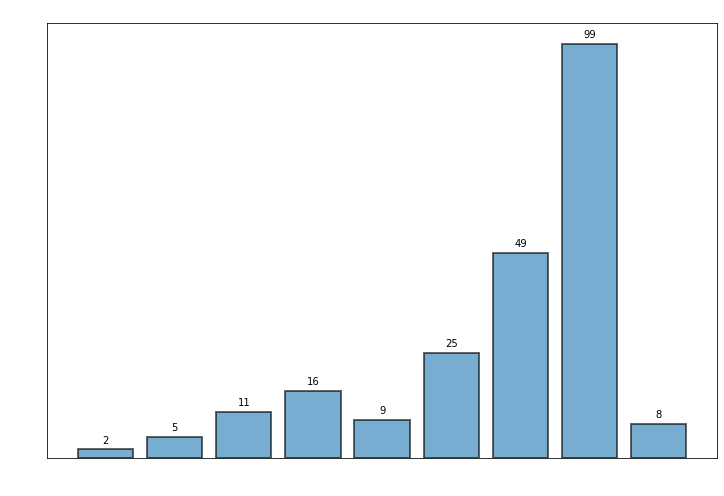

In [6]:
fig, ax = plt.subplots()

ax.bar(uniages, count, alpha=0.6, bottom=2, edgecolor="k", linewidth=2)

fig.set_figwidth(12)
fig.set_figheight(8)

ax.set_title('Количество просмотренных фильмов в 2020 по декадам').set_color('white')
ax.set_xlabel('Декады').set_color('white')
ax.set_ylabel('Количество фильмов').set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

rects = ax.patches

# Make some labels.
labels = count

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label,
            ha='center', va='bottom')

plt.show()